# Deep Neural Network acrchitecture

Purpose: Create DNN architecture.

Author: Gabriel Rodrigues Palma and Rafael de Andrade Moral

In [155]:
# visualisation modules
import matplotlib.pyplot as plt

# Data manipulation modules
import numpy as np
import pandas as pd

# Machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Deep learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Machine learning packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import collections
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelBinarizer

# Additional packages
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import L1
#from scikeras.wrappers import KerasClassifier
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

# Testing GPU from MacOs
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Functions used in the project

In [156]:
def create_dataset(path):
    ''' This function reads and prepare the datasets for applying the ML and DL methods'''
    data = pd.read_csv(path)
    data = data.drop(columns = 'Unnamed: 0')
    explanatory_variables = data.drop(columns = 'status')
    response_variables = data['status']
    binarizer = LabelBinarizer()
    response_variables = binarizer.fit_transform(response_variables)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    hot_encode_response_variable = onehot_encoder.fit_transform(np.array(response_variables).reshape(-1, 1))  
    
    scaler = MinMaxScaler() # Scaling the variables
    scaler.fit(explanatory_variables)
    explanatory_variables = scaler.transform(explanatory_variables)

    
    return(explanatory_variables, hot_encode_response_variable, response_variables)

# Importing data

In [128]:
explanatory_variables, hot_encode_response_variable, response_variables = create_dataset('../../input_data/customer_profiles_from_model.csv')

In [137]:
X_train, X_test, y_train, y_test = train_test_split(explanatory_variables, 
                                                    response_variables, 
                                                    test_size=0.3, random_state = 42)

In [143]:
naive_explanatory_variables, naive_hot_encode_response_variable, naive_response_variables = create_dataset('../../input_data/raw_data_naive.csv')

In [144]:
naive_X_train, naive_X_test, naive_y_train, naive_y_test = train_test_split(naive_explanatory_variables, 
                                                    naive_response_variables, 
                                                    test_size=0.3, random_state = 42)

# Obtaining DNN performance with proposed data

In [140]:
model = Sequential()
model.add(Dense(11, input_shape=(11,)))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'mse', 
             metrics = ['accuracy', 'TruePositives', 'FalsePositives', 'FalseNegatives', 'TrueNegatives'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_557 (Dense)           (None, 11)                132       
                                                                 
 dense_558 (Dense)           (None, 12)                144       
                                                                 
 dense_559 (Dense)           (None, 13)                169       
                                                                 
 dense_560 (Dense)           (None, 14)                196       
                                                                 
 dense_561 (Dense)           (None, 15)                225       
                                                                 
 dense_562 (Dense)           (None, 14)                224       
                                                                 
 dense_563 (Dense)           (None, 13)              

In [145]:
model.fit(X_train, y_train, batch_size = 10,
          validation_data = (X_test, y_test), epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 37ms/step - loss: 0.1794 - accuracy: 0.8571 - true_positives: 14.0000 - false_positives: 3.0000 - false_negatives: 1.0000 - true_negatives: 10.0000 - val_loss: 0.1862 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1840 - accuracy: 0.7857 - true_positives: 14.0000 - false_positives: 5.0000 - false_negatives: 1.0000 - true_negatives: 8.0000 - val_loss: 0.1960 - val_accuracy: 0.7500 - val_true_positives: 5.0000 - val_false_positives: 3.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 4.0000
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 0.1815 - accuracy: 0.7857 - true_positives: 14.0000 - false_positives: 5.0000 - false_negatives: 1.0000 - true_negatives: 8.0000 - val_loss: 0.1775 - val_accuracy: 0.8333 - val_true_positives: 5.00

3/3 [==============================] - 0s 31ms/step - loss: 0.1758 - accuracy: 0.8571 - true_positives: 13.0000 - false_positives: 2.0000 - false_negatives: 2.0000 - true_negatives: 11.0000 - val_loss: 0.1960 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 24/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1866 - accuracy: 0.7500 - true_positives: 14.0000 - false_positives: 6.0000 - false_negatives: 1.0000 - true_negatives: 7.0000 - val_loss: 0.2419 - val_accuracy: 0.6667 - val_true_positives: 5.0000 - val_false_positives: 4.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 3.0000
Epoch 25/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1931 - accuracy: 0.7143 - true_positives: 14.0000 - false_positives: 7.0000 - false_negatives: 1.0000 - true_negatives: 6.0000 - val_loss: 0.1834 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_f

3/3 [==============================] - 0s 29ms/step - loss: 0.1376 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1606 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 46/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1394 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1608 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 47/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1366 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1729 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val

3/3 [==============================] - 0s 30ms/step - loss: 0.1148 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1570 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 68/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1140 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1496 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 69/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1134 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1502 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val

3/3 [==============================] - 0s 29ms/step - loss: 0.0997 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1385 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 90/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0990 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1389 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val_false_positives: 2.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 5.0000
Epoch 91/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0992 - accuracy: 0.8929 - true_positives: 14.0000 - false_positives: 2.0000 - false_negatives: 1.0000 - true_negatives: 11.0000 - val_loss: 0.1399 - val_accuracy: 0.8333 - val_true_positives: 5.0000 - val

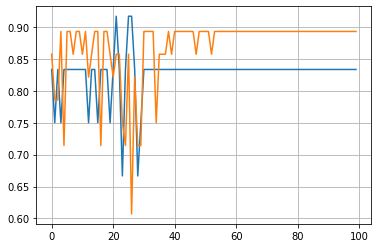

In [146]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.grid()
plt.show()

In [147]:
model.save('DNN_model_params.h5')

# Obtaining DNN performance with raw data

In [151]:
model = Sequential()
model.add(Dense(11, input_shape=(1011,)))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
              loss = 'mse', 
             metrics = ['accuracy', 'TruePositives', 'FalsePositives', 'FalseNegatives', 'TrueNegatives'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_575 (Dense)           (None, 11)                11132     
                                                                 
 dense_576 (Dense)           (None, 12)                144       
                                                                 
 dense_577 (Dense)           (None, 13)                169       
                                                                 
 dense_578 (Dense)           (None, 14)                196       
                                                                 
 dense_579 (Dense)           (None, 15)                225       
                                                                 
 dense_580 (Dense)           (None, 14)                224       
                                                                 
 dense_581 (Dense)           (None, 13)              

In [152]:
model.fit(naive_X_train, naive_y_train, batch_size = 10,
          validation_data = (naive_X_test, naive_y_test), epochs=100)

Epoch 1/100


2022-07-25 12:02:50.845125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.4643 - true_positives: 6.0000 - false_positives: 6.0000 - false_negatives: 9.0000 - true_negatives: 7.0000

2022-07-25 12:02:52.131224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 2s 531ms/step - loss: 0.2500 - accuracy: 0.4643 - true_positives: 6.0000 - false_positives: 6.0000 - false_negatives: 9.0000 - true_negatives: 7.0000 - val_loss: 0.2500 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 102ms/step - loss: 0.2500 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2501 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 65ms/step - loss: 0.2500 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2502 - val_accuracy: 0.4167 - val_true_p

Epoch 23/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2497 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2508 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 24/100
3/3 [==============================] - 0s 30ms/step - loss: 0.2497 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2509 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 25/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2497 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2509 - val_accura

Epoch 45/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2495 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2515 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 46/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2495 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2515 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 47/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2494 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2516 - val_accura

Epoch 67/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2493 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2521 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 68/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2493 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2521 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 69/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2493 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2522 - val_accura

Epoch 89/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2492 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2526 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 90/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2492 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2526 - val_accuracy: 0.4167 - val_true_positives: 5.0000 - val_false_positives: 7.0000 - val_false_negatives: 0.0000e+00 - val_true_negatives: 0.0000e+00
Epoch 91/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2492 - accuracy: 0.5357 - true_positives: 15.0000 - false_positives: 13.0000 - false_negatives: 0.0000e+00 - true_negatives: 0.0000e+00 - val_loss: 0.2527 - val_accura

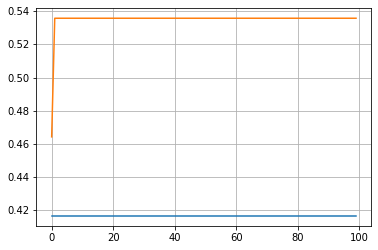

In [153]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.grid()
plt.show()

In [154]:
model.save('DNN_raw.h5')